In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

In [165]:
dataset = pd.read_csv("/content/car data.csv")
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [166]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 185 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Driven_kms     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Selling_type   210 non-null    object 
 7   Transmission   210 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 14.8+ KB


In [168]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
target = 'Selling_Price'

In [169]:
X = dataset[features]
y = dataset[target]


In [170]:
# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Split the data into training and testing sets without creating copies
X_train, X_test, y_train, y_test = train_test_split(X.index, y.index, test_size=0.3, random_state=42)

# Initialize a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor using the original dataset
rf_regressor.fit(X.loc[X_train], y.loc[y_train])

# Predict the prices for the test set
y_pred = rf_regressor.predict(X.loc[X_test])

# Evaluate the model
mse = mean_squared_error(y.loc[y_test], y_pred)
r2 = r2_score(y.loc[y_test], y_pred)


In [171]:
print(X)

     Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
0    2014           5.59       27000      0                 0   
1    2013           9.54       43000      0                 1   
2    2017           9.85        6900      0                 0   
3    2011           4.15        5200      0                 0   
4    2014           6.87       42450      0                 1   
..    ...            ...         ...    ...               ...   
296  2016          11.60       33988      0                 1   
297  2015           5.90       60000      0                 0   
298  2009          11.00       87934      0                 0   
299  2017          12.50        9000      0                 1   
300  2016           5.90        5464      0                 0   

     Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0                   1                        0                    1  
1                   0                        0                    1  
2        

In [172]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2)

In [174]:
lin_reg_model = LinearRegression()

In [175]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [176]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [178]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8823856405331196


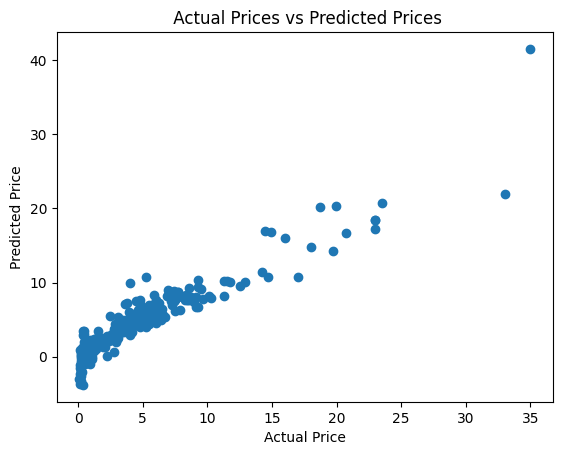

In [179]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [182]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [184]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8694567179819735


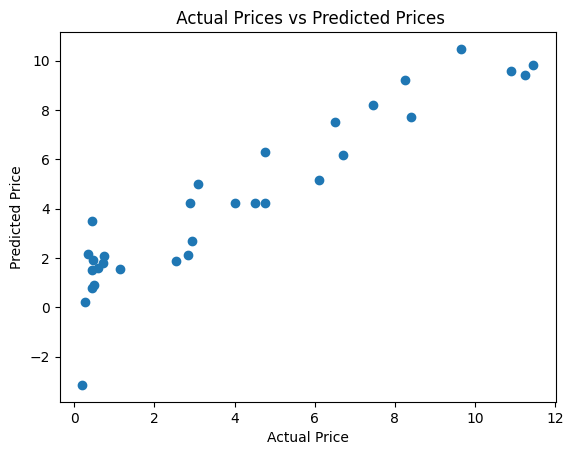

In [186]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [190]:
#lasso Regression
# loading the linear regression model
lass_reg_model = Lasso()

In [192]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [193]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [195]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


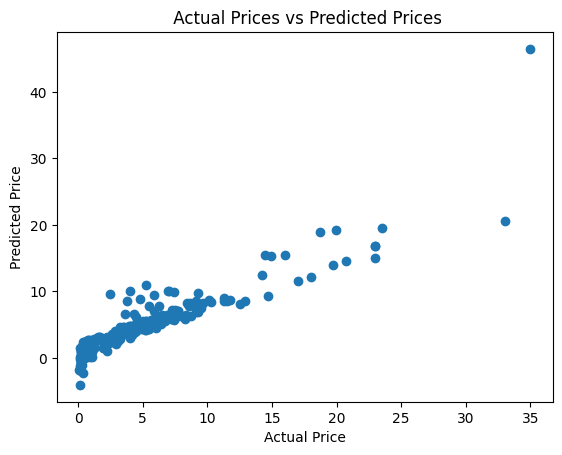

In [197]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [198]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)


In [200]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


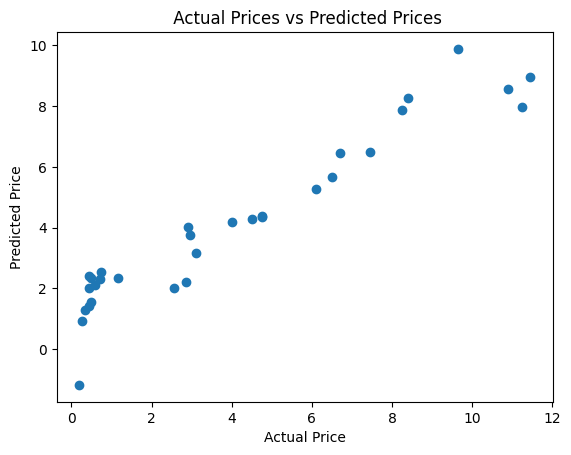

In [201]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [202]:
# Define and prepare the new data with consistent one-hot encoding
new_data = pd.DataFrame({
    'Year': [2020],  # Replace with the actual values
    'Present_Price': [10.5],
    'Driven_kms': [50000],
    'Fuel_Type': ['Petrol'],  # Replace with the actual values
    'Selling_type': ['Dealer'],  # Replace with the actual values
    'Transmission': ['Manual'],  # Replace with the actual values
    'Owner': [1]
})


In [203]:
# Convert categorical variables using one-hot encoding
new_data = pd.get_dummies(new_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Ensure that the feature names match those used during training
missing_features = set(X.columns) - set(new_data.columns)
for feature in missing_features:
    new_data[feature] = 0  # Add missing features with default value

# Reorder columns to match the order during training
new_data = new_data[X.columns]

# Predict prices for the new data using the trained model
new_predictions = rf_regressor.predict(new_data)

In [204]:
# Print the predicted prices
print('Predicted Prices for New Data:')
print(new_predictions)

Predicted Prices for New Data:
[7.9164]
